**CODSOFT**

**Task 02- Car Sales Prediction**

**Akash Kokne - Data Science Intern**

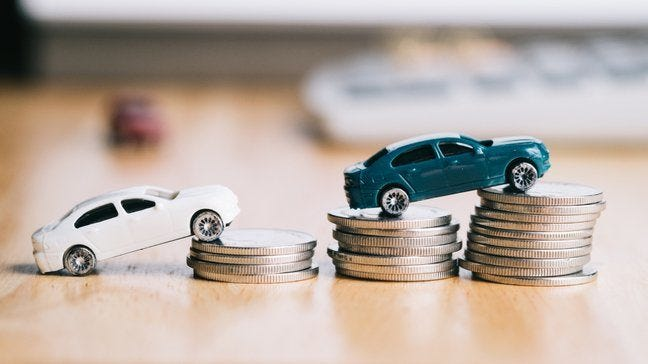

In [1]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Now let’s read the data using the pandas data frame
df = pd.read_csv("car_purchasing.csv", encoding='ISO-8859-1')
df.head()

customer name                                    customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        country  gender        age  annual Salary  credit card debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     net worth  car purchase amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773          42925.70921  
3  548599.0524          67422.36313  
4  560304.0671          55915.46248

In [3]:
# To know number of columns and rows 
df.shape

(500, 9)

In [4]:
#To know the information about each column like the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [5]:
# Statistical information
df.describe()

gender         age  annual Salary  credit card debt  \
count  500.000000  500.000000     500.000000        500.000000   
mean     0.506000   46.241674   62127.239608       9607.645049   
std      0.500465    7.978862   11703.378228       3489.187973   
min      0.000000   20.000000   20000.000000        100.000000   
25%      0.000000   40.949969   54391.977195       7397.515792   
50%      1.000000   46.049901   62915.497035       9655.035568   
75%      1.000000   51.612263   70117.862005      11798.867487   
max      1.000000   70.000000  100000.000000      20000.000000   

            net worth  car purchase amount  
count      500.000000           500.000000  
mean    431475.713625         44209.799218  
std     173536.756340         10773.178744  
min      20000.000000          9000.000000  
25%     299824.195900         37629.896040  
50%     426750.120650         43997.783390  
75%     557324.478725         51254.709517  
max    1000000.000000         80000.000000

In [6]:
df = df.drop(['customer name','customer e-mail'],axis='columns')
df.head()

country  gender        age  annual Salary  credit card debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     net worth  car purchase amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773          42925.70921  
3  548599.0524          67422.36313  
4  560304.0671          55915.46248

In [7]:
#check is any missing values
df.isnull().sum()

country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [8]:
df.country.value_counts()

Israel                 6
Mauritania             6
Bolivia                6
Greenland              5
Saint Barthélemy       5
                      ..
El Salvador            1
Denmark                1
Oman                   1
Trinidad and Tobago    1
marlal                 1
Name: country, Length: 211, dtype: int64

In [9]:
# CONVERTING AGE TO INT
df['age'] = df['age'].apply(lambda x: int(x))
df.head()

country  gender  age  annual Salary  credit card debt    net worth  \
0      Bulgaria       0   41    62812.09301      11609.380910  238961.2505   
1        Belize       0   40    66646.89292       9572.957136  530973.9078   
2       Algeria       1   43    53798.55112      11160.355060  638467.1773   
3  Cook Islands       1   58    79370.03798      14426.164850  548599.0524   
4        Brazil       1   57    59729.15130       5358.712177  560304.0671   

   car purchase amount  
0          35321.45877  
1          45115.52566  
2          42925.70921  
3          67422.36313  
4          55915.46248

In [10]:
# lets see which country have heighest amount
df[df['car purchase amount']==80000]

country  gender  age  annual Salary  credit card debt  net worth  \
315  Namibia       1   55    83333.81054       9874.075327  1000000.0   

     car purchase amount  
315              80000.0

In [11]:
# checking if all namibians have high amounts or is it just 1 person, found that it really is just 1 person
df[df['country']=='Namibia']

country  gender  age  annual Salary  credit card debt     net worth  \
27   Namibia       0   55    61388.62709      14270.007310   341691.9337   
100  Namibia       1   52    61858.19077       5189.083564   706977.0530   
315  Namibia       1   55    83333.81054       9874.075327  1000000.0000   
443  Namibia       0   42    65605.41798      13629.110400   297540.8814   

     car purchase amount  
27           49091.97185  
100          57441.44414  
315          80000.00000  
443          38901.60925

In [12]:
# which country has lowest amount
df[df['car purchase amount']==9000]

country  gender  age  annual Salary  credit card debt  \
453  Norfolk Island       0   25    45092.74073       11380.09288   

       net worth  car purchase amount  
453  158758.3577               9000.0

In [13]:
# lets see which countries have heighest amount
df.groupby("country")["car purchase amount"].sum().sort_values(ascending=False)

country
Israel               295273.97524
Iraq                 248155.14736
Saint Barthélemy     247988.78204
Algeria              238760.34165
Equatorial Guinea    235561.95293
                         ...     
Saudi Arabia          27586.71854
Honduras              26599.90843
Cameroon              25971.95673
American Samoa        24221.99937
Montenegro            22599.45863
Name: car purchase amount, Length: 211, dtype: float64

In [14]:
st = df['age'].std()
mean = df['age'].mean()

In [15]:
upper =  mean + (3*st)
lower  =  mean - (3*st) 
upper,lower

(69.73995606480578, 21.80804393519422)

In [16]:
df[(df['age']>upper) | (df['age']<lower)]

country  gender  age  annual Salary  credit card debt  \
194                Haiti       0   70    52323.24480       12438.85648   
444  Congo (Brazzaville)       1   20    70467.29492         100.00000   

       net worth  car purchase amount  
194  346555.1716          56229.41270  
444  494606.6334          28645.39425

In [17]:
df = df[(df['age']<upper) & (df['age']>lower)]
df.head()

country  gender  age  annual Salary  credit card debt    net worth  \
0      Bulgaria       0   41    62812.09301      11609.380910  238961.2505   
1        Belize       0   40    66646.89292       9572.957136  530973.9078   
2       Algeria       1   43    53798.55112      11160.355060  638467.1773   
3  Cook Islands       1   58    79370.03798      14426.164850  548599.0524   
4        Brazil       1   57    59729.15130       5358.712177  560304.0671   

   car purchase amount  
0          35321.45877  
1          45115.52566  
2          42925.70921  
3          67422.36313  
4          55915.46248

In [18]:
# 85% of people are below age of 59
df['age'].quantile(0.95)

59.0

### Data Visualization 

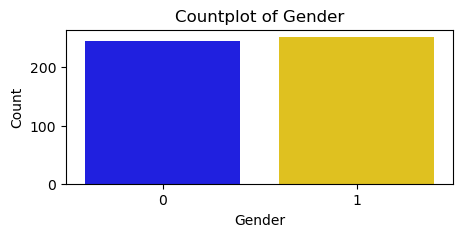

In [19]:
# Countplot for the "gender" variable with custom colors for gender 0 and 1
plt.figure(figsize=(5, 2))
custom_palette = {0: "blue", 1: "gold"}  # Define custom colors for gender 0 and 1
sns.countplot(data=df, x="gender", palette=custom_palette)
plt.title("Countplot of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

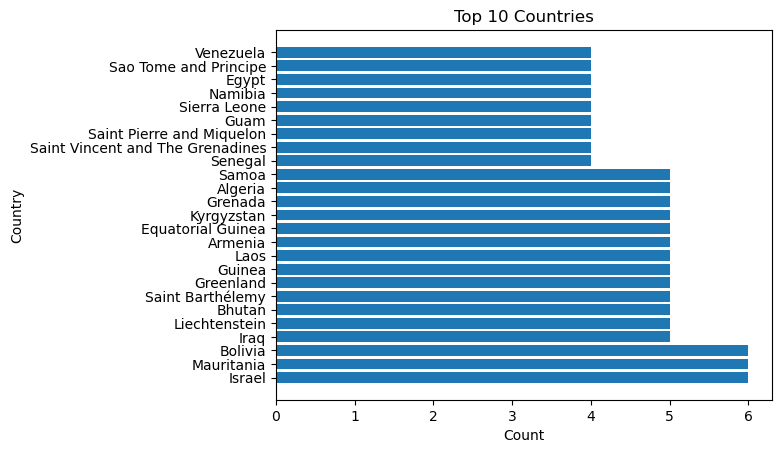

In [20]:
top_n = df['country'].value_counts().head(25)  
plt.barh(top_n.index, top_n.values)
plt.xlabel("Count")
plt.ylabel("Country")
plt.title("Top 10 Countries")
plt.show()

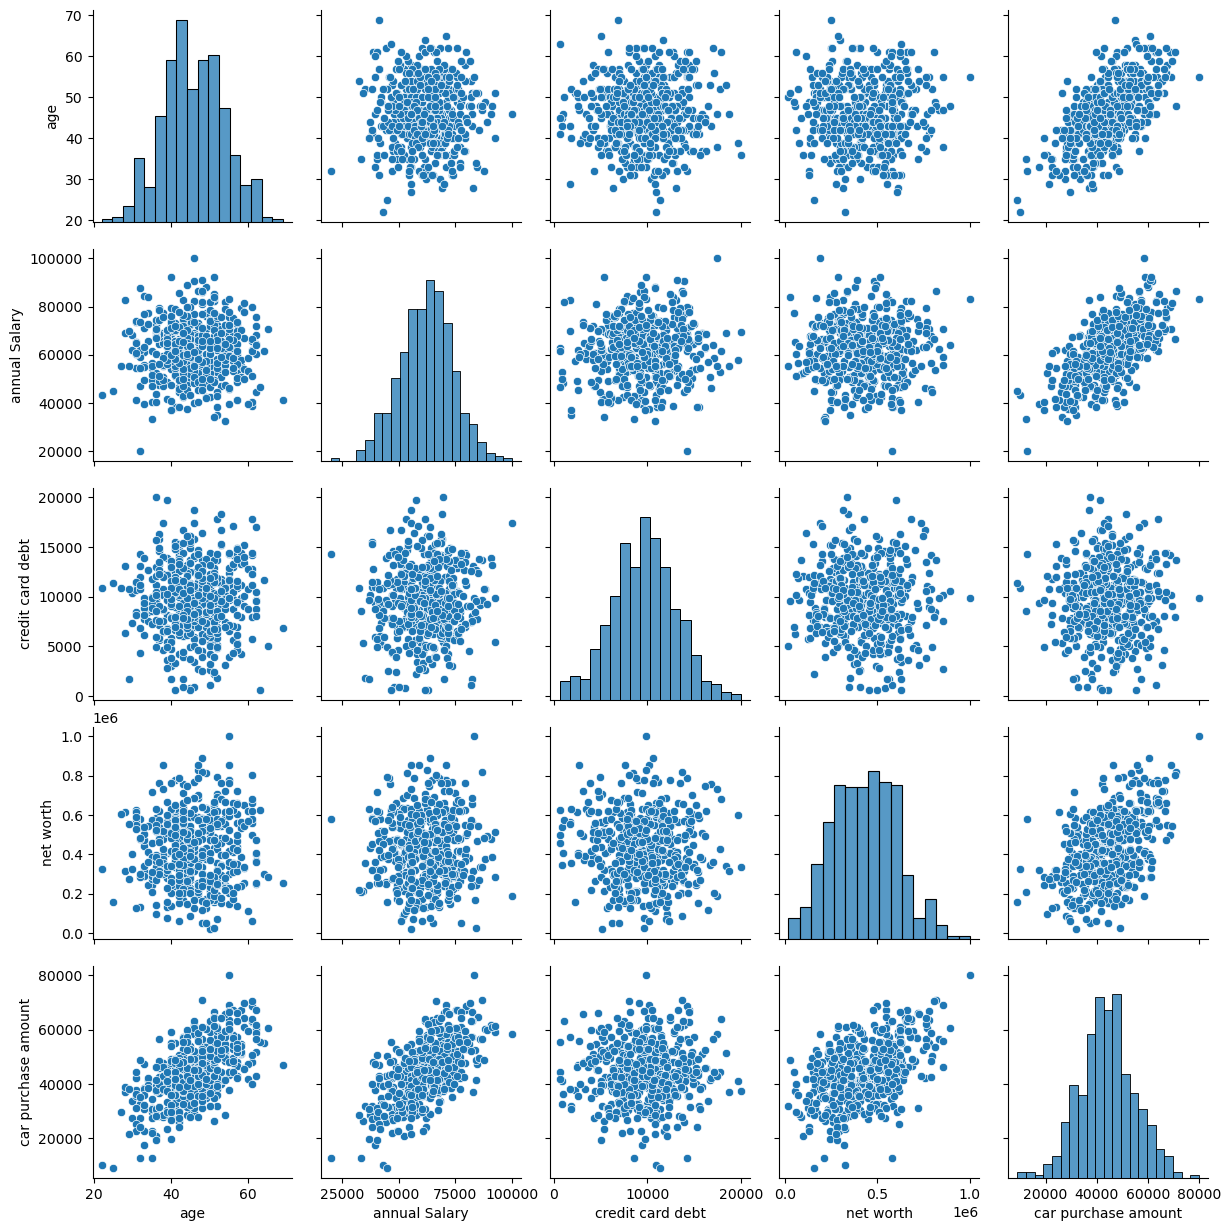

In [21]:
sns.pairplot(data=df,vars=['age','annual Salary','credit card debt','net worth','car purchase amount'])

In [22]:
df = df.drop(['gender','country'],axis='columns')

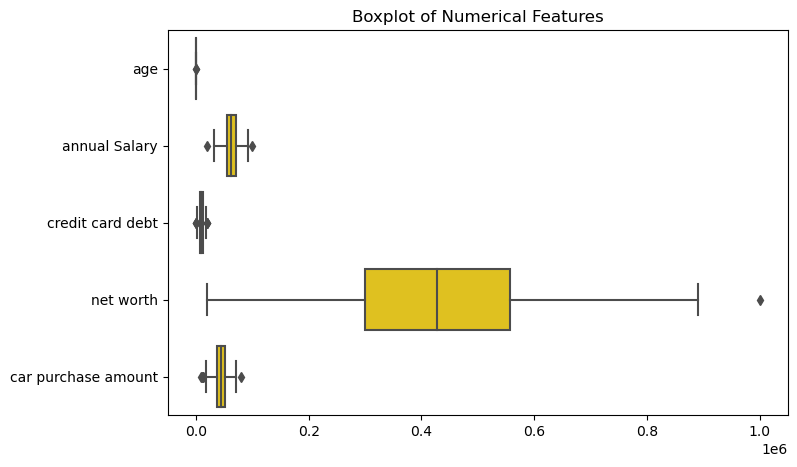

In [23]:
# Boxplot to visualize the distribution of numerical features
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, orient="h",color='gold')
plt.title("Boxplot of Numerical Features")
plt.show()

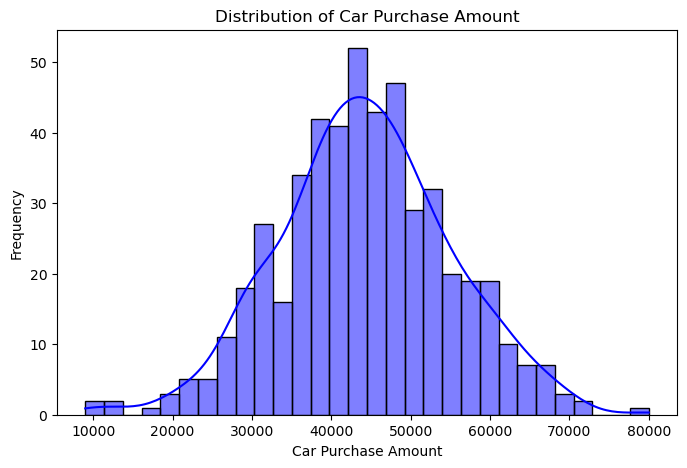

In [24]:
# Distribution of the target variable "car purchase amount" with custom colors
plt.figure(figsize=(8, 5))
sns.histplot(df["car purchase amount"], bins=30, kde=True, color='blue')
plt.title("Distribution of Car Purchase Amount")
plt.xlabel("Car Purchase Amount")
plt.ylabel("Frequency")
plt.show()

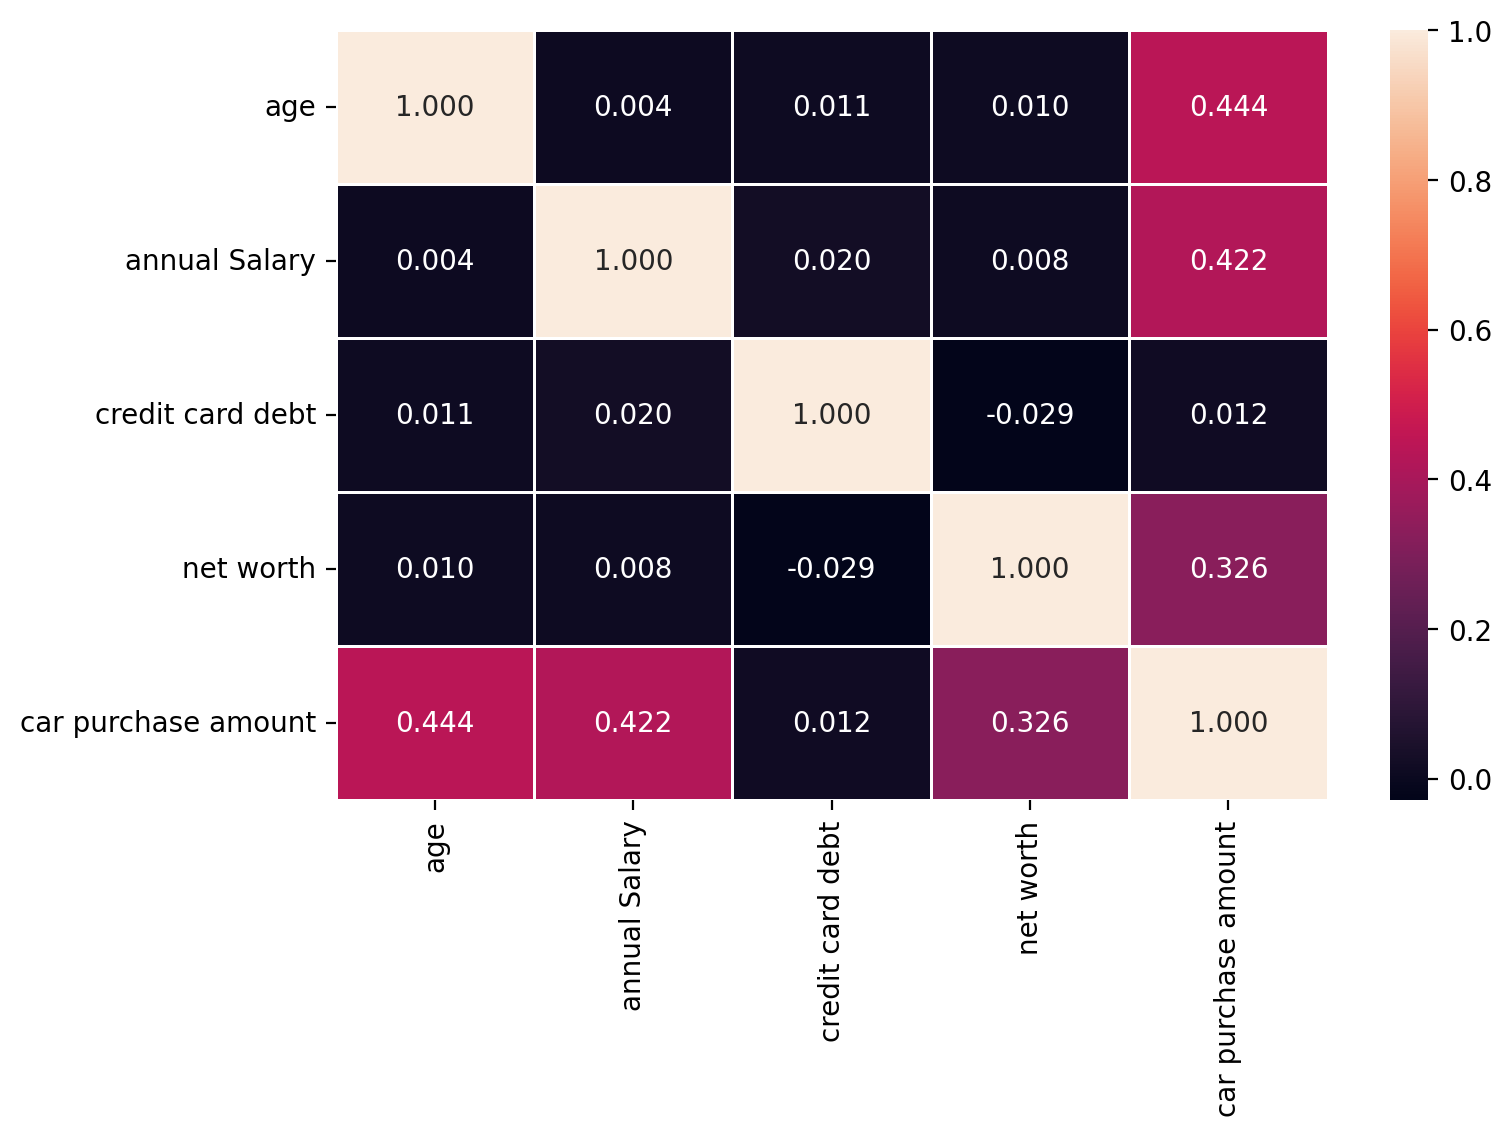

In [25]:
# Now check correlation of features
corr = df.corr(method = "kendall")
plt.figure(figsize=(8,5), dpi = 200)
sns.heatmap(corr, annot=True, fmt=".3f", linewidth=.5)
plt.show()

In [26]:
X = df.drop("car purchase amount",axis = 1)
y = df["car purchase amount"]

### Data Pre-Processing

In [27]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1,1))

#### Split data into train & test data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ANN Model

In [29]:
model = Sequential()

model.add(Dense(10,activation = 'relu',input_dim=4))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(1,activation = 'linear'))

model.compile(optimizer = 'adam',loss = "mean_squared_error",metrics=["mean_absolute_error"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
history = model.fit(X_train,y_train,epochs = 50 , validation_split = 0.2)

Epoch 1/50
10/10 [==============================] - 6s 108ms/step - loss: 0.2011 - mean_absolute_error: 0.4235 - val_loss: 0.1815 - val_mean_absolute_error: 0.4090
Epoch 2/50
10/10 [==============================] - 0s 24ms/step - loss: 0.1620 - mean_absolute_error: 0.3759 - val_loss: 0.1439 - val_mean_absolute_error: 0.3596
Epoch 3/50
10/10 [==============================] - 0s 20ms/step - loss: 0.1247 - mean_absolute_error: 0.3243 - val_loss: 0.1045 - val_mean_absolute_error: 0.2985
Epoch 4/50
10/10 [==============================] - 0s 21ms/step - loss: 0.0848 - mean_absolute_error: 0.2580 - val_loss: 0.0637 - val_mean_absolute_error: 0.2239
Epoch 5/50
10/10 [==============================] - 0s 42ms/step - loss: 0.0499 - mean_absolute_error: 0.1856 - val_loss: 0.0332 - val_mean_absolute_error: 0.1524
Epoch 6/50
10/10 [==============================] - 0s 24ms/step - loss: 0.0293 - mean_absolute_error: 0.1341 - val_loss: 0.0196 - val_mean_absolute_error: 0.1124
Epoch 7/50
10/10 [===

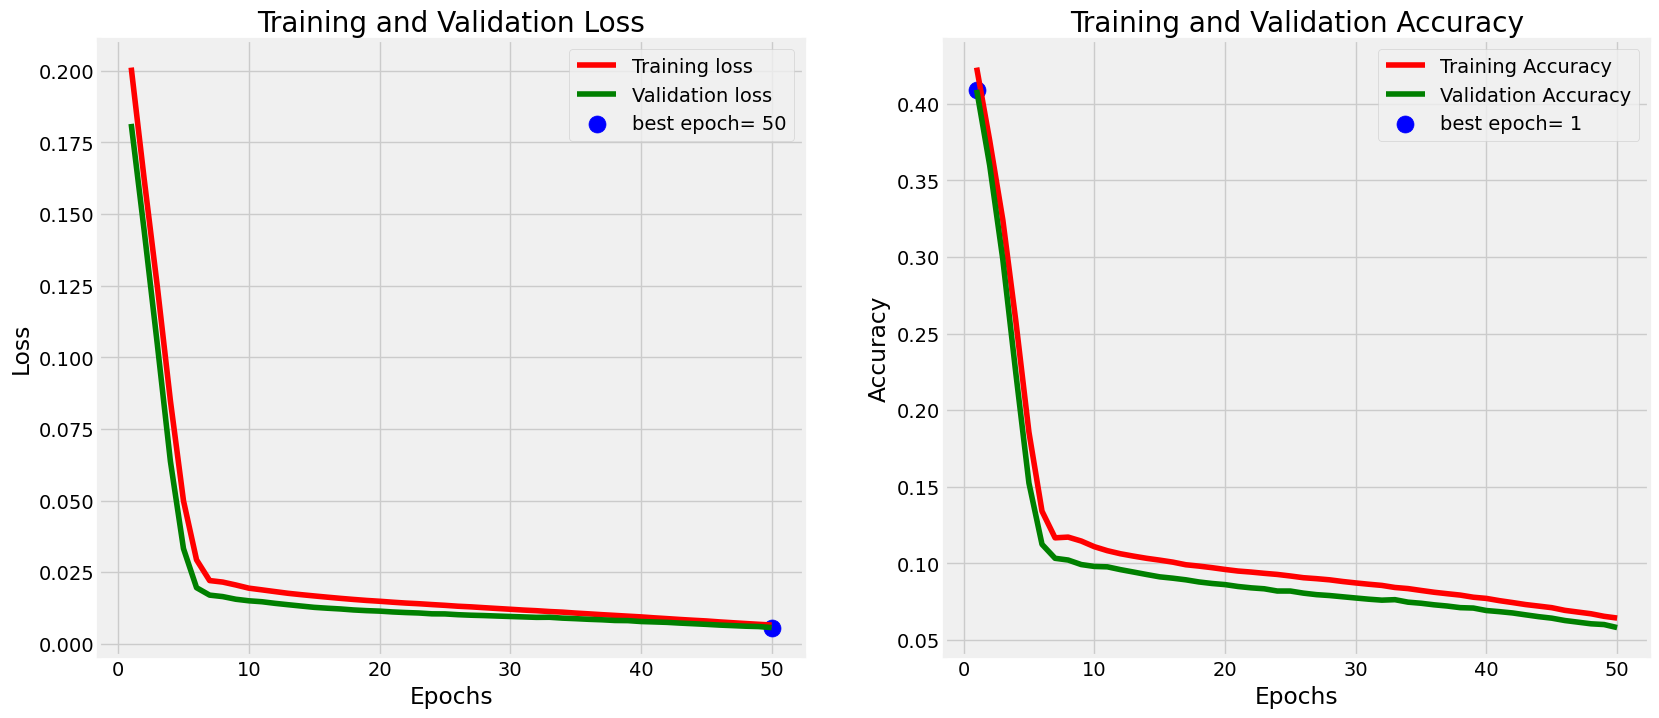

In [31]:
# Define needed variables
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [32]:
y_pred = model.predict(X_test)

4/4 [==============================] - 2s 17ms/step


In [33]:
R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

R2 Score= 0.6778247863580742


** **Thank You** **